<a href="https://colab.research.google.com/github/Jude-Ufoh/Taxi-Fare-Prediction-Machine-Learning-/blob/main/Taxi_Trip_Fare_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas opendatasets scikit-learn xgboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'


In [3]:
%%time

od.download(dataset_url)

100%|██████████| 1.56G/1.56G [01:27<00:00, 19.2MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 47.7 s, sys: 13.6 s, total: 1min 1s
Wall time: 2min 32s


In [4]:
data_dir = './new-york-city-taxi-fare-prediction'

# **Viewing the content of the downloaded Data**

In [5]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Aug 11 14:35 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Aug 11 14:35 sample_submission.csv
-rw-r--r-- 1 root root 960K Aug 11 14:35 test.csv
-rw-r--r-- 1 root root 5.4G Aug 11 14:36 train.csv


In [6]:
!wc -l {data_dir}/train.csv

!wc -l {data_dir}/test.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv
9914 ./new-york-city-taxi-fare-prediction/test.csv


In [7]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [8]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [9]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [10]:
sample_fraction = 0.01
import random
def skip_row(row_index):
  if row_index == 0:
    return False
  return random.random() > sample_fraction
random.seed(42)
selected_columns = ['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
dtypes = {'fare_amount' : 'float32',
          'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude':'float32',
         'passenger_count': 'uint8'}


**Loading training set with Pandas**

In [11]:
# Loading training set with Pandas
import pandas as pd
df=pd.read_csv(f'{data_dir}/train.csv', parse_dates= ['pickup_datetime'],usecols=selected_columns, dtype=dtypes, skiprows=skip_row )

In [12]:
# Loading testing set with Pandas
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [15]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


#**Exploratory Data Analysis on Training and Test Dataset**

##**EDA on Training Data**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [17]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [17]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

##**EDA on Test Data**

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [19]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [20]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

#**Exploartory Data Analysis**

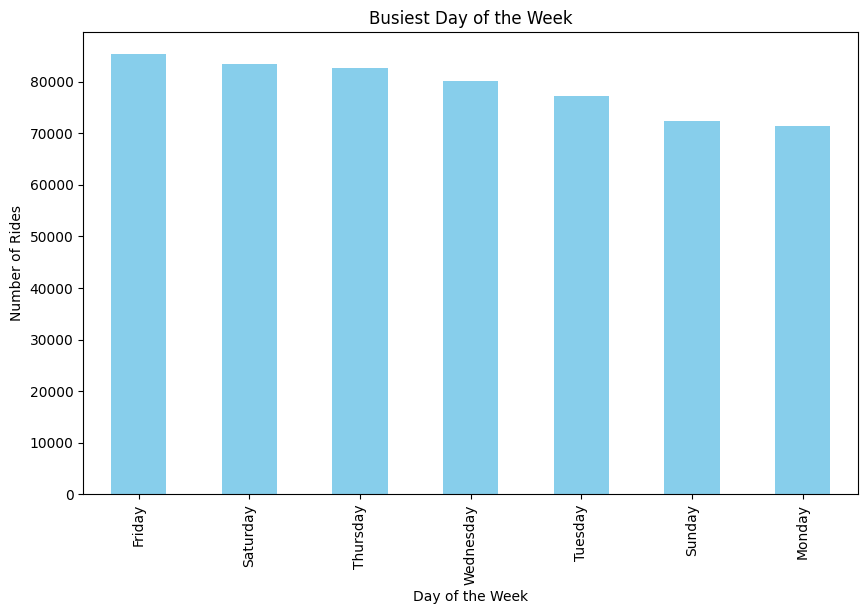

In [21]:
import matplotlib.pyplot as plt

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
busiest_day = df['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
busiest_day.plot(kind='bar', color='skyblue')
plt.title('Busiest Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


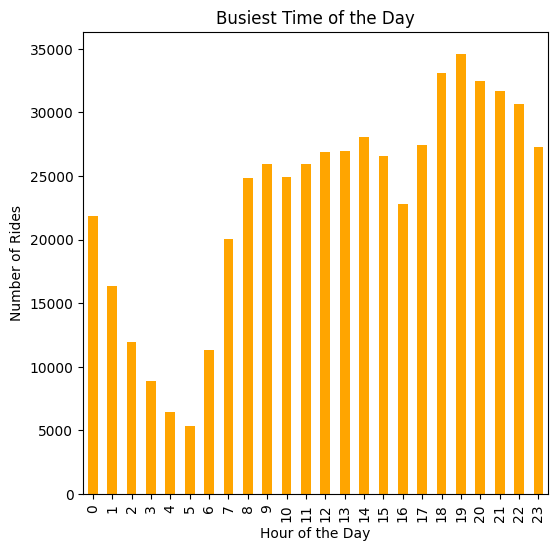

In [103]:
df['hour_of_day'] = df['pickup_datetime'].dt.hour
busiest_time = df['hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
busiest_time.plot(kind='bar', color='orange')
plt.title('Busiest Time of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

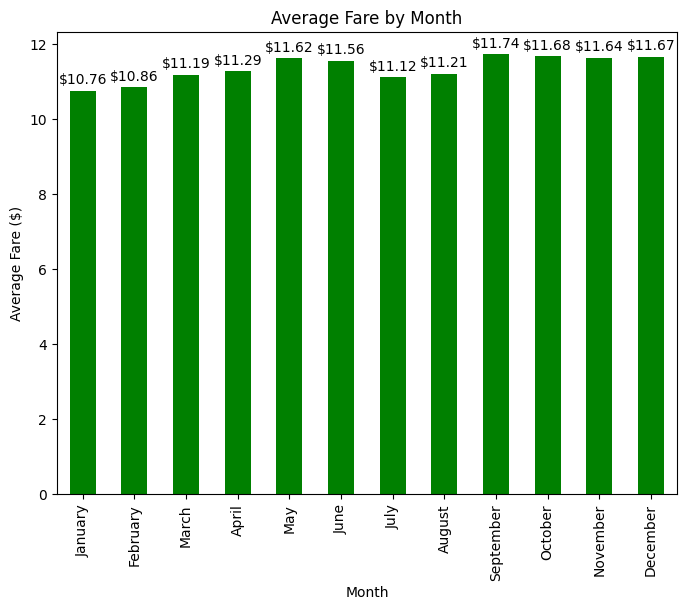

In [40]:
# Extract month names from the pickup datetime
df['month_name'] = df['pickup_datetime'].dt.month_name()

# Calculate average fare per month
monthly_fares = df.groupby('month_name')['fare_amount'].mean()

# Reindex to ensure months are in calendar order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_fares = monthly_fares.reindex(ordered_months)

# Plot the average fare by month
plt.figure(figsize=(8, 6))
bars = monthly_fares.plot(kind='bar', color='green')
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare ($)')

# Add value labels on each bar
for index, value in enumerate(monthly_fares):
    plt.text(index, value + 0.1, f'${value:.2f}', ha='center', va='bottom')

plt.show()

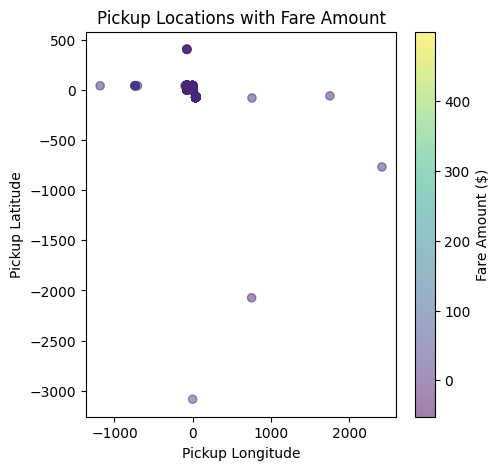

In [38]:
plt.figure(figsize=(5, 5))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=df['fare_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Fare Amount ($)')
plt.title('Pickup Locations with Fare Amount')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()


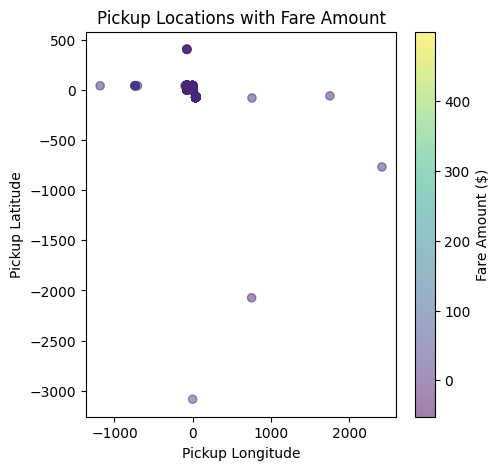

In [39]:
plt.figure(figsize=(5, 5))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=df['fare_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Fare Amount ($)')
plt.title('Pickup Locations with Fare Amount')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()


In [35]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                df['dropoff_latitude'], df['dropoff_longitude'])

average_distance = df['distance_km'].mean()
print(f"The average ride distance is {average_distance:.2f} km")


The average ride distance is 20.19 km


# 3. **Prepare Dataset for Training**

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Dropping missing values

In [43]:
train_df = train_df.dropna()
val_df = val_df.dropna()

## Extract Input and Output

In [44]:
df.columns


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour_of_day', 'month', 'month_name', 'distance_km'],
      dtype='object')

In [45]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [46]:
target_col = 'fare_amount'

## **Training**

In [47]:
train_inputs = train_df[input_cols]

In [48]:
train_targets = train_df[target_col]

In [49]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [50]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


**Validation**

In [51]:
val_inputs = val_df[input_cols]

In [52]:
val_targets = val_df[target_col]

In [53]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [54]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


**Test**

In [55]:
test_inputs = test_df[input_cols]
test_inputs


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


## **Feature Engineering**
Here we extract parts of the date which are Year, Month, Day, Weekday and Hour and also remove outliers and invalid data.

In [57]:
# We define a function to add date parts to a DataFrame.
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [58]:
# Adding the datepart column to the different datasets
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')



In [59]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour_of_day,month,month_name,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,Sunday,3,4,April,1.324242,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,Wednesday,19,1,January,0.000000,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,Wednesday,10,10,October,2.326965,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,Wednesday,13,3,March,2.560520,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,Sunday,15,2,February,1.244048,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,Sunday,16,9,September,1.550950,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,Sunday,9,4,April,7.121000,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,Thursday,19,7,July,3.253644,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,Thursday,18,2,February,2.147450,2011,2,17,3,18


In [62]:
#def haversine(lat1, lon1, lat2, lon2):

def add_trip_distance(df):
    df['trip_distance'] = haversine(df['pickup_latitude'],df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

In [64]:
add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)

## **Adding distances from popular landmarkd**
|Landmark|longitude|Latitude|
|--------|---------|--------|
|JFK Airport |-73.7781| 40.6413|
|LGA Airport|-73.8740|40.7769|
|EWR Airport|-74.1745|40.6895|
|Met Meuseum|-73.9632|40.7794|
|World Trade Centre|-74.0099|40.7126|

In [67]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [71]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [72]:
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [74]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour_of_day,month,...,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
335602,48.25,2009-06-15 15:05:15+00:00,-73.786987,40.639397,-73.914948,40.821629,4,Monday,15,6,...,6,15,0,15,22.953552,16.207331,4.757572,29.142282,5.520780,11.076838
432098,8.50,2013-09-10 07:53:00+00:00,-73.959442,40.771461,-73.975555,40.757084,1,Tuesday,7,9,...,9,10,1,7,2.096964,22.245073,11.308453,22.218090,1.534606,4.055702
129402,6.50,2011-03-20 12:27:00+00:00,-74.004005,40.725777,-73.991570,40.742340,1,Sunday,12,3,...,3,20,6,12,2.119358,23.940842,13.116157,20.404940,3.352924,2.232976
188917,4.70,2009-03-05 17:38:00+00:00,-73.985687,40.757412,-73.991791,40.749916,1,Thursday,17,3,...,3,5,3,17,0.979148,23.996477,13.123570,20.400272,3.304726,2.316202
447552,5.30,2010-02-08 15:38:02+00:00,-73.988892,40.758511,-73.973885,40.762844,1,Monday,15,2,...,2,8,0,15,1.352475,22.091728,11.115100,22.419470,1.292063,4.290887


## **Removing outliers and invalid data**

In [75]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,month,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937862,1.684444,13.506568,6.263920,19.764175,2011.740038,6.263920,15.732492,3.035813,13.506568,19.764175,194.621719,184.425690,195.437988,176.301712,177.545135
std,9.789793,11.795325,8.464263,12.398610,9.857421,1.344170,6.517710,3.434881,371.532562,1.857024,3.434881,8.697374,1.950033,6.517710,371.532562,1225.392090,1228.287231,1229.815430,1230.425781,1230.575195
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000,0.000000,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.110663,0.074286,0.129722,0.016537,0.009747
25%,6.000000,-73.992027,40.734859,-73.991409,40.733967,1.000000,9.000000,3.000000,1.213209,2010.000000,3.000000,8.000000,1.000000,9.000000,1.213209,21.267213,10.345312,20.433391,1.502573,2.327526
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,14.000000,6.000000,2.117583,2012.000000,6.000000,16.000000,3.000000,14.000000,2.117583,22.848711,11.948072,21.709468,2.615588,3.625534
75%,12.500000,-73.967186,40.767006,-73.963715,40.768044,2.000000,19.000000,9.000000,3.882061,2013.000000,9.000000,23.000000,5.000000,19.000000,3.882061,24.024391,13.220044,23.572245,3.972008,5.499777
max,400.000000,2420.209473,404.899994,2467.752686,3351.403076,208.000000,23.000000,12.000000,16924.054688,2015.000000,12.000000,31.000000,6.000000,23.000000,16924.054688,15087.860352,15090.146484,15081.589844,15088.475586,15085.541016


### There seems to be outliers in
- **Fare amount** because we are not suppose to have a negative value
- **Passenger Count** because a single trip cannot carry up to 208 passengers
- **Pickup latitude and longitude** as we cannot have values greater than 360 or less that -360
-**Dropoff latitude and longitude** for the same reason above

We therefor need to create a constraint with the following range:
- fare_amount: 1 to 500
- longitudes: -75 to -72
- latitudes: 40 to 42
- passenger_count: 1 to 6

In [78]:
#We then create a function to remove these outliers
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [81]:
train_df = remove_outliers(train_df)
val_df = remove_outliers(val_df)

## **Split Input and Targets**

In [82]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour_of_day', 'month', 'month_name', 'distance_km',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [83]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [84]:
target_col = 'fare_amount'

In [85]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
test_inputs = test_df[input_cols]

We define a helper function to evaluate models and generate test predictions

In [87]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

# **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [93]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 7min 17s, sys: 1.28 s, total: 7min 19s
Wall time: 6min 6s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [94]:
evaluate(model2)

(3.623353201468282,
 4.1548979248329,
 array([ 6.88716674,  9.04626982,  9.25848761, ...,  9.84050779,
         7.75344326, 10.4990501 ]),
 array([12.43849815,  6.19889194, 47.32974747, ...,  8.79470159,
        28.89660231,  8.53254765]))

In [95]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': input_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                    Feature  Importance
0          pickup_longitude         0.0
1           pickup_latitude         0.0
2         dropoff_longitude         0.0
3          dropoff_latitude         0.0
4           passenger_count         0.0
5      pickup_datetime_year         0.0
6     pickup_datetime_month         0.0
7       pickup_datetime_day         0.0
8   pickup_datetime_weekday         0.0
9      pickup_datetime_hour         0.0
10            trip_distance         0.0
11        jfk_drop_distance         0.0
12        lga_drop_distance         0.0
13        ewr_drop_distance         0.0
14        met_drop_distance         0.0
15        wtc_drop_distance         0.0


#**Gradient Boosting**




















In [97]:
from xgboost import XGBRegressor

In [99]:
model = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [101]:
model.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [102]:
evaluate(model)

(3.1693218,
 3.9895563,
 array([ 6.722254 ,  8.07213  ,  9.9489   , ..., 11.631137 ,  9.063206 ,
        10.2748165], dtype=float32),
 array([14.537398 ,  5.7531376, 49.024925 , ...,  8.040598 , 29.60076  ,
         9.145157 ], dtype=float32))